In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6145

Best Fitness:	1400.1595
Solution:	1400.0000
Diff:		0.1595

[0:08:55][----------] 1.96% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6314

Best Fitness:	1400.1453
Solution:	1400.0000
Diff:		0.1453

[0:17:27][----------] 3.92% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6350

Best Fitness:	1400.1722
Solution:	1400.0000
Diff:		0.1722

[0:26:16][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6078

Best Fitness:	1400.1561
Solution:	1400.0000
Diff:		0.1561

[0:34:51][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5567

Best Fitness:	1400.1136
Solution:	1400.0000
Diff:		0.1136

[0:42:30][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6154

Best Fitness:	1400.2488
Solution:	1400.0000
Diff:		0.2488

[0:49:37][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6359

Best Fitness:	1400.1625
Solution:	1400.0000
Diff:		0.1625

[0:56:39][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5989

Best Fitness:	1400.1499
Solution:	1400.0000
Diff:		0.1499

[1:03:24][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6090

Best Fitness:	1400.1490
Solution:	1400.0000
Diff:		0.1490

[1:10:29][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6345

Best Fitness:	1400.1469
Solution:	1400.0000
Diff:		0.1469

[1:17:36][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5922

Best Fitness:	1400.1580
Solution:	1400.0000
Diff:		0.1580

[1:24:49][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6326

Best Fitness:	1400.1306
Solution:	1400.0000
Diff:		0.1306

[1:32:00][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6745

Best Fitness:	1400.1093
Solution:	1400.0000
Diff:		0.1093

[1:38:02][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6345

Best Fitness:	1400.1361
Solution:	1400.0000
Diff:		0.1361

[1:44:01][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6443

Best Fitness:	1400.2792
Solution:	1400.0000
Diff:		0.2792

[1:50:11][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6316

Best Fitness:	1400.2144
Solution:	1400.0000
Diff:		0.2144

[1:56:18][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5839

Best Fitness:	1400.1623
Solution:	1400.0000
Diff:		0.1623

[2:02:25][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6090

Best Fitness:	1400.2222
Solution:	1400.0000
Diff:		0.2222

[2:08:30][####------] 35.29% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6215

Best Fitness:	1400.1413
Solution:	1400.0000
Diff:		0.1413

[2:15:03][####------] 37.25% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6034

Best Fitness:	1400.1684
Solution:	1400.0000
Diff:		0.1684

[2:21:00][####------] 39.22% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5860

Best Fitness:	1400.1702
Solution:	1400.0000
Diff:		0.1702

[2:26:24][####------] 41.18% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5993

Best Fitness:	1400.0955
Solution:	1400.0000
Diff:		0.0955

[2:31:32][####------] 43.14% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5889

Best Fitness:	1400.1489
Solution:	1400.0000
Diff:		0.1489

[2:36:52][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6127

Best Fitness:	1400.1478
Solution:	1400.0000
Diff:		0.1478

[2:42:14][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6528

Best Fitness:	1400.2635
Solution:	1400.0000
Diff:		0.2635

[2:47:35][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6161

Best Fitness:	1400.2499
Solution:	1400.0000
Diff:		0.2499

[2:52:51][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5980

Best Fitness:	1400.1209
Solution:	1400.0000
Diff:		0.1209

[2:58:17][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5988

Best Fitness:	1400.0843
Solution:	1400.0000
Diff:		0.0843

[3:03:28][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6355

Best Fitness:	1400.2264
Solution:	1400.0000
Diff:		0.2264

[3:08:08][######----] 56.86% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5914

Best Fitness:	1400.1188
Solution:	1400.0000
Diff:		0.1188

[3:12:35][######----] 58.82% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6120

Best Fitness:	1400.0710
Solution:	1400.0000
Diff:		0.0710

[3:17:10][######----] 60.78% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5930

Best Fitness:	1400.1940
Solution:	1400.0000
Diff:		0.1940

[3:21:35][######----] 62.75% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5943

Best Fitness:	1400.1037
Solution:	1400.0000
Diff:		0.1037

[3:26:10][######----] 64.71% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5913

Best Fitness:	1400.1095
Solution:	1400.0000
Diff:		0.1095

[3:30:42][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6035

Best Fitness:	1400.1389
Solution:	1400.0000
Diff:		0.1389

[3:35:11][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6015

Best Fitness:	1400.1112
Solution:	1400.0000
Diff:		0.1112

[3:39:35][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6156

Best Fitness:	1400.1890
Solution:	1400.0000
Diff:		0.1890

[3:43:25][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6561

Best Fitness:	1400.2445
Solution:	1400.0000
Diff:		0.2445

[3:47:14][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5808

Best Fitness:	1400.1482
Solution:	1400.0000
Diff:		0.1482

[3:50:59][########--] 76.47% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6150

Best Fitness:	1400.1659
Solution:	1400.0000
Diff:		0.1659

[3:54:47][########--] 78.43% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5952

Best Fitness:	1400.1229
Solution:	1400.0000
Diff:		0.1229

[3:58:35][########--] 80.39% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6044

Best Fitness:	1400.1305
Solution:	1400.0000
Diff:		0.1305

[4:02:21][########--] 82.35% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5863

Best Fitness:	1400.1184
Solution:	1400.0000
Diff:		0.1184

[4:06:08][########--] 84.31% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6148

Best Fitness:	1400.1727
Solution:	1400.0000
Diff:		0.1727

[4:09:34][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5799

Best Fitness:	1400.1116
Solution:	1400.0000
Diff:		0.1116

[4:12:38][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6184

Best Fitness:	1400.1837
Solution:	1400.0000
Diff:		0.1837

[4:15:42][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6011

Best Fitness:	1400.1963
Solution:	1400.0000
Diff:		0.1963

[4:18:46][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6192

Best Fitness:	1400.1262
Solution:	1400.0000
Diff:		0.1262

[4:21:47][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6219

Best Fitness:	1400.2302
Solution:	1400.0000
Diff:		0.2302

[4:24:46][##########] 96.08% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.5842

Best Fitness:	1400.1287
Solution:	1400.0000
Diff:		0.1287

[4:27:47][##########] 98.04% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1400.6030

Best Fitness:	1400.2057
Solution:	1400.0000
Diff:		0.2057

[4:30:57][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:30:57

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
226,0.776239,0.839201,1.114778,0.995766,1.177149,0.413764,0.773302,0.920197,0.487936,0.382045,...,0.282706,0.639941,0.538596,0.730742,0.592598,0.388144,0.695554,0.558584,0.567736,50
227,0.776239,0.839201,1.114778,0.995766,1.177149,0.413764,0.773302,0.920197,0.487936,0.382045,...,0.282706,0.639941,0.538596,0.730742,0.592598,0.388144,0.695554,0.558584,0.567736,50
228,0.776239,0.839201,1.114778,0.995766,1.177149,0.413764,0.773302,0.920197,0.487936,0.382045,...,0.282706,0.639941,0.538596,0.730742,0.592598,0.388144,0.695554,0.558584,0.567736,50
229,0.776239,0.839201,1.114778,0.995766,1.177149,0.413764,0.773302,0.920197,0.487936,0.382045,...,0.282706,0.639941,0.538596,0.730742,0.592598,0.388144,0.695554,0.558584,0.567736,50
230,0.776239,0.839201,1.114778,0.995766,1.177149,0.413764,0.773302,0.920197,0.487936,0.382045,...,0.282706,0.639941,0.538596,0.730742,0.592598,0.388144,0.695554,0.533716,0.567736,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.1595136441012528

Best error for run 1: 0.1452565525519276

Best error for run 2: 0.17217680460043994

Best error for run 3: 0.15614809123007944

Best error for run 4: 0.11359389652511709

Best error for run 5: 0.2488492955781112

Best error for run 6: 0.16249079560725477

Best error for run 7: 0.14994797778490465

Best error for run 8: 0.14902622042450275

Best error for run 9: 0.1468552178371283

Best error for run 10: 0.15797431498799597

Best error for run 11: 0.1305797876179895

Best error for run 12: 0.10928504626963331

Best error for run 13: 0.13608354026973757

Best error for run 14: 0.2791658673568236

Best error for run 15: 0.21435489453119771

Best error for run 16: 0.16230142845256523

Best error for run 17: 0.22217442310420665

Best error for run 18: 0.14129792265430297

Best error for run 19: 0.1684431671612856

Best error for run 20: 0.17015408100405693

Best error for run 21: 0.09550413750912412

Best error for run 22: 0.14892360294743412

Best error for run 23: 0.14775322589207462

Best error for run 24: 0.26348047551550735

Best error for run 25: 0.2499333446487526

Best error for run 26: 0.12092598220851869

Best error for run 27: 0.08433885037015898

Best error for run 28: 0.2263954626830582

Best error for run 29: 0.11883735915625948

Best error for run 30: 0.07098994940815828

Best error for run 31: 0.19397835435347588

Best error for run 32: 0.10367284493145235

Best error for run 33: 0.1094846046407838

Best error for run 34: 0.1389361876554176

Best error for run 35: 0.11119342286337996

Best error for run 36: 0.18895693593935903

Best error for run 37: 0.24452472975895034

Best error for run 38: 0.14822077634494235

Best error for run 39: 0.16594160916952205

Best error for run 40: 0.12291599939362641

Best error for run 41: 0.13049667262612274

Best error for run 42: 0.11844075608246385

Best error for run 43: 0.17265095824450327

Best error for run 44: 0.11157038050419033

Best error for run 45: 0.18374774678522954

Best error for run 46: 0.1963411974807059

Best error for run 47: 0.1262292256269575

Best error for run 48: 0.2302426010705858

Best error for run 49: 0.1287450974523381

Best error for run 50: 0.20573345891511963

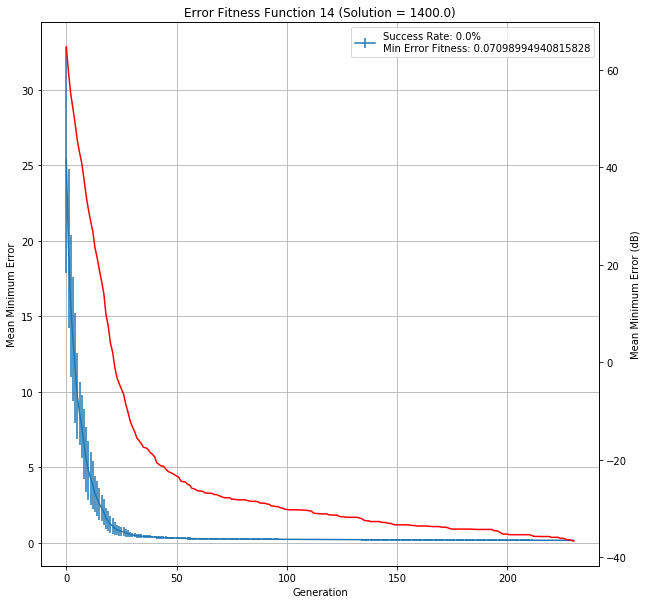

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.7,0.159514,0.145257,0.172177,0.156148,0.113594,0.248849,...,0.11157,0.183748,0.196341,0.126229,0.230243,0.128745,0.205733,0.159898,4:30:57,69900
